In [1]:
import pickle
with open('characters.pickle','rb') as fp:
    characters = pickle.load(fp)

array([0.81592567, 0.11941002, 0.04351671, 0.0211476 ])

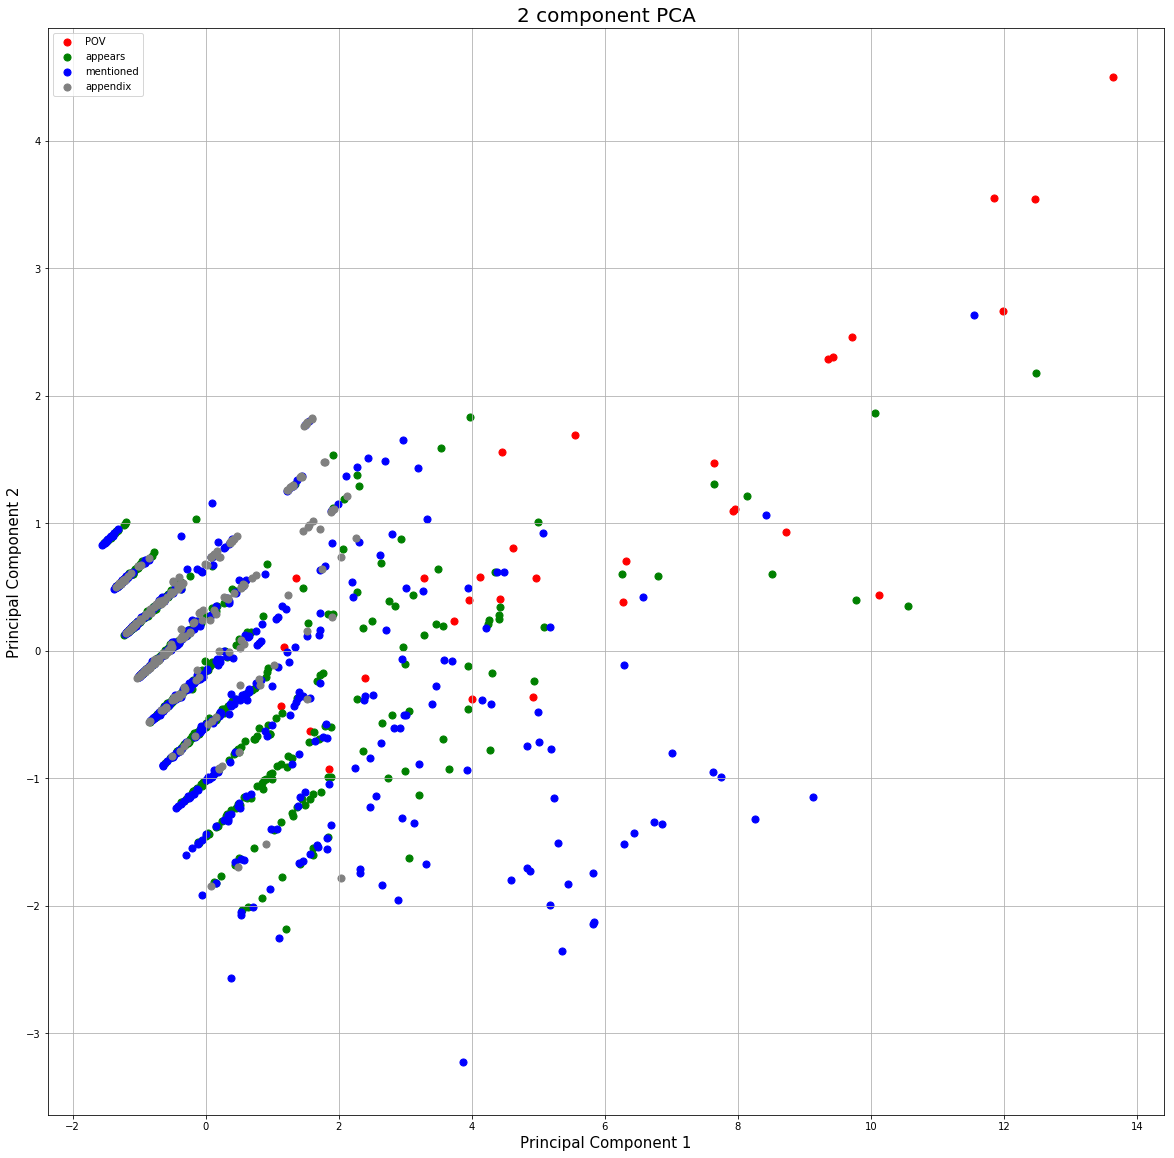

In [2]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df  = pandas.DataFrame.from_dict(characters)

score2 = StandardScaler().fit_transform(df[['awoif_infobox_length','awoif_page_size','awoif_in_degree','awoif_out_degree']])

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(score2)
principalDf = pandas.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4'])
finalDf = pandas.concat([principalDf, df[['category']]], axis = 1)

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

categories = ['POV', 'appears', 'mentioned','appendix']
colors = ['red', 'green', 'blue','gray']

for category, color in zip(categories,colors):
    indicesToKeep = finalDf['category'] == category
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(categories)
ax.grid()

pca.explained_variance_ratio_